In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
traindatagen = ImageDataGenerator(rescale=1)
testdatagen = ImageDataGenerator(rescale=1)

train_root = r'D:\PYTHON\cnn\flowers\train'
test_root = r'D:\PYTHON\cnn\flowers\test'

training = traindatagen.flow_from_directory(train_root,batch_size=64,target_size=(100,100))
testing = testdatagen.flow_from_directory(test_root,batch_size=64,target_size=(100,100))



 


Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


Search space summary
Default search space size: 1
layer_size (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512], 'ordered': True}

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
256               |256               |layer_size

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.3247 - loss: 24.8233 - val_accuracy: 0.3650 - val_loss: 1.4614
Epoch 2/10
29/49 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.4501 - loss: 1.3184

KeyboardInterrupt: 

In [ ]:
# #copying 30% images tro test folder for testing purposes



# import os
# import random
# import shutil

# # 1. Update these to your EXACT paths


# # DEBUG: Check if the train path even exists
# if not os.path.exists(train_root):
#     print(f"ERROR: The system cannot find the path: {train_root}")
# else:
#     classes = os.listdir(train_root)
#     print(f"Found {len(classes)} items in the train folder: {classes}")

#     for class_name in classes:
#         train_class_path = os.path.join(train_root, class_name)
        
#         # Check if it's a directory
#         if os.path.isdir(train_class_path):
#             test_class_path = os.path.join(test_root, class_name)
#             os.makedirs(test_class_path, exist_ok=True)

#             all_images = [img for img in os.listdir(train_class_path) 
#                           if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
#             print(f"Processing class '{class_name}': Found {len(all_images)} images.")

#             if len(all_images) > 0:
#                 num_to_move = min(240, len(all_images))
#                 selected_images = random.sample(all_images, num_to_move)

#                 for img_name in selected_images:
#                     source = os.path.join(train_class_path, img_name)
#                     destination = os.path.join(test_class_path, img_name)
#                     shutil.move(source, destination)
                
#                 print(f"Successfully moved {num_to_move} images to {test_class_path}")
#             else:
#                 print(f"Skipping '{class_name}': No images found inside.")
#         else:
#             print(f"Skipping '{class_name}': It is a file, not a folder.")

# print("\n--- Process Finished ---")

Found 5 items in the train folder: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Processing class 'daisy': Found 764 images.
Successfully moved 240 images to D:\PYTHON\cnn\flowers\test\daisy
Processing class 'dandelion': Found 1052 images.
Successfully moved 240 images to D:\PYTHON\cnn\flowers\test\dandelion
Processing class 'rose': Found 784 images.
Successfully moved 240 images to D:\PYTHON\cnn\flowers\test\rose
Processing class 'sunflower': Found 733 images.
Successfully moved 240 images to D:\PYTHON\cnn\flowers\test\sunflower
Processing class 'tulip': Found 984 images.
Successfully moved 240 images to D:\PYTHON\cnn\flowers\test\tulip

--- Process Finished ---


In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(5,activation='softmax'))


d:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(training,validation_data=testing,epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4642 - loss: 1.2986 - val_accuracy: 0.5625 - val_loss: 1.1399
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5797 - loss: 1.0416 - val_accuracy: 0.6133 - val_loss: 0.9786
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 771ms/step - accuracy: 0.6298 - loss: 0.9351 - val_accuracy: 0.6242 - val_loss: 0.9409
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 717ms/step - accuracy: 0.6763 - loss: 0.8444 - val_accuracy: 0.6475 - val_loss: 0.9316
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.7077 - loss: 0.7564 - val_accuracy: 0.6083 - val_loss: 1.0441
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 536ms/step - accuracy: 0.7507 - loss: 0.6537 - val_accuracy: 0.6592 - val_loss: 0.9355
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7732 - loss: 0.6005 - val_accuracy: 0.6425 - val_loss: 1.1024
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8046 - loss: 0.5101 - val_accuracy: 0.5958

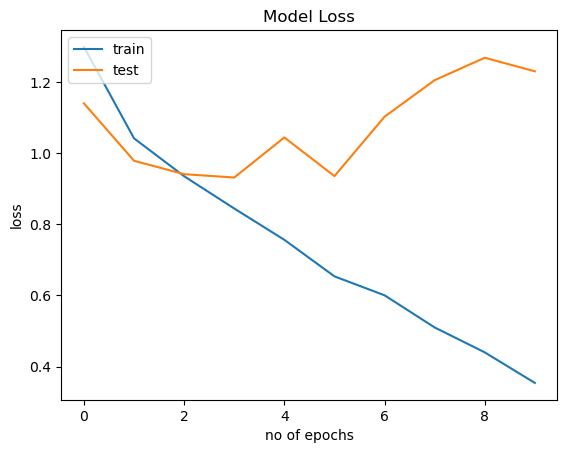

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


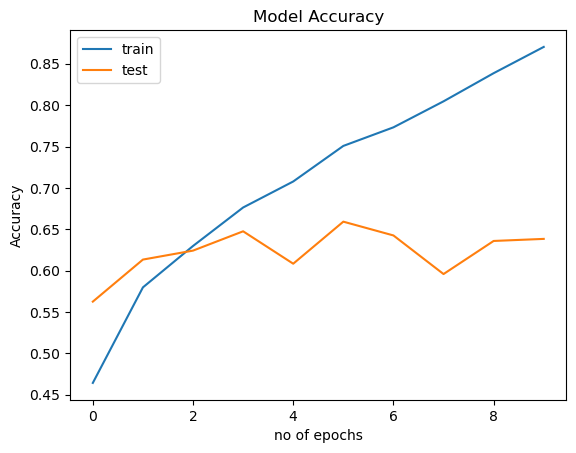

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
print("Is GPU available: ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  False


In [ ]:
classlabels = training.class_indices
print(classlabels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
